In [1]:
%matplotlib inline
import utils; reload(utils)
from utils import *

Using Theano backend.


## Simple linear regression in terms of a neural network: x -> y

In [2]:
# indep variable
x = np.array(range(30))/30.

In [3]:
# noise 
d = random(30)
# response + noise
y = 1. + 2. * x + d 

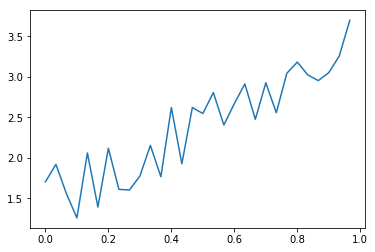

In [4]:
plt.plot(x,y)

In [5]:
# build model: one (dense) layer nn, 1 output node, 1 input node
lm = Sequential([Dense(1, input_shape=(1,))])
# use Mean Squared error as loss function, and stochastic gradient descent
lm.compile(optimizer=SGD(lr=0.1), loss='mse') 
lm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_1 (InputLayer)       (None, 1)             0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             2           dense_input_1[0][0]              
Total params: 2
Trainable params: 2
Non-trainable params: 0
____________________________________________________________________________________________________


In [6]:
lm.evaluate(x, y, verbose=0)

5.7995572090148926

In [7]:
lm.fit(x, y, nb_epoch=8, batch_size=30)

Epoch 1/8
30/30 [==============================] - 0s - loss: 5.7996
Epoch 2/8
30/30 [==============================] - 0s - loss: 3.3193
Epoch 3/8
30/30 [==============================] - 0s - loss: 1.9237
Epoch 4/8
30/30 [==============================] - 0s - loss: 1.1381
Epoch 5/8
30/30 [==============================] - 0s - loss: 0.6956
Epoch 6/8
30/30 [==============================] - 0s - loss: 0.4461
Epoch 7/8
30/30 [==============================] - 0s - loss: 0.3051
Epoch 8/8
30/30 [==============================] - 0s - loss: 0.2252


## Multiple linear regression: (x1, x2) -> y

In [4]:
x = random((30,2))

In [5]:
y = np.dot(x, [2., 3.]) + 1.

In [6]:
x[:5]

array([[ 0.2631,  0.1704],
       [ 0.5833,  0.891 ],
       [ 0.7163,  0.5518],
       [ 0.8603,  0.0093],
       [ 0.72  ,  0.5304]])

In [7]:
lm = Sequential([Dense(1, input_shape=(2,))])
lm.compile(optimizer=SGD(lr=0.1), loss='mse')

In [8]:
lm.evaluate(x, y, verbose=0)

10.746356964111328

In [9]:
%time lm.fit(x, y, nb_epoch=8, batch_size=1)

Epoch 1/8
30/30 [==============================] - 0s - loss: 1.1171      
Epoch 2/8
30/30 [==============================] - 0s - loss: 0.1278         
Epoch 3/8
30/30 [==============================] - 0s - loss: 0.0609     
Epoch 4/8
30/30 [==============================] - 0s - loss: 0.0253     
Epoch 5/8
30/30 [==============================] - 0s - loss: 0.0102     
Epoch 6/8
30/30 [==============================] - 0s - loss: 0.0048     
Epoch 7/8
30/30 [==============================] - 0s - loss: 0.0019     
Epoch 8/8
30/30 [==============

In [10]:
lm.evaluate(x, y, verbose=0)

0.00054498703684657812

In [11]:
lm.get_weights()

[array([[ 1.9436],
        [ 2.9516]], dtype=float32), array([ 1.0546], dtype=float32)]

In [12]:
??get_data

In [13]:
??get_batches

In [16]:
??gen.flow_from_directory

Object `gen.flow_from_directory` not found.


In [17]:
lm.model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_input_1 (InputLayer)       (None, 2)             0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             3           dense_input_1[0][0]              
Total params: 3
Trainable params: 3
Non-trainable params: 0
____________________________________________________________________________________________________
